In [6]:
# Setup matplotlib to plot inline (within the notebook)
###
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
###
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
###
import pandas as pd
# Import NumPy under the abbreviation 'np'
###
import numpy as np

In [7]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart_disease = pd.read_csv(r'C:\Users\HP\Desktop\teeeee\data\heart-disease.csv')

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Create X (all columns except target)
X = heart_disease.drop('target', axis=1)

# Create y (only the target column)
y = heart_disease['target']

In [9]:
# Import train_test_split from sklearn's model_selection module
###
from sklearn.model_selection import train_test_split
# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
# View the different shapes of the training and test datasets
###
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [11]:
# Import the RandomForestClassifier from sklearn's ensemble module
###
from sklearn.ensemble import RandomForestClassifier
# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

In [12]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train,y_train )

RandomForestClassifier()

In [13]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [14]:
# Evaluate the fitted model on the training set using the score() function
###
clf.score(X_train,y_train)

1.0

In [15]:
# Evaluate the fitted model on the test set using the score() function
###
clf.score(X_test,y_test)

0.7894736842105263

NOW, DIFFERENT MODEL


In [16]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [17]:
# models = { 
#     ""
# }
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

result = {}

In [18]:
for modelname , model in models.items():
    model.fit(X_train, y_train)
    result[modelname]= model.score(X_test,y_test)


result

c:\Users\HP\Desktop\AI-ENGINEER PROJECT\projenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8026315789473685,
 'KNN': 0.6578947368421053,
 'SVC': 0.6052631578947368,
 'LogisticRegression': 0.8026315789473685,
 'RandomForestClassifier': 0.7894736842105263}

In [19]:
np.random.seed(42)
for modelname , model in models.items():
    model.fit(X_train, y_train)
    result[modelname]= model.score(X_test,y_test)


result

c:\Users\HP\Desktop\AI-ENGINEER PROJECT\projenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8026315789473685,
 'KNN': 0.6578947368421053,
 'SVC': 0.6052631578947368,
 'LogisticRegression': 0.8026315789473685,
 'RandomForestClassifier': 0.7763157894736842}

<Axes: >

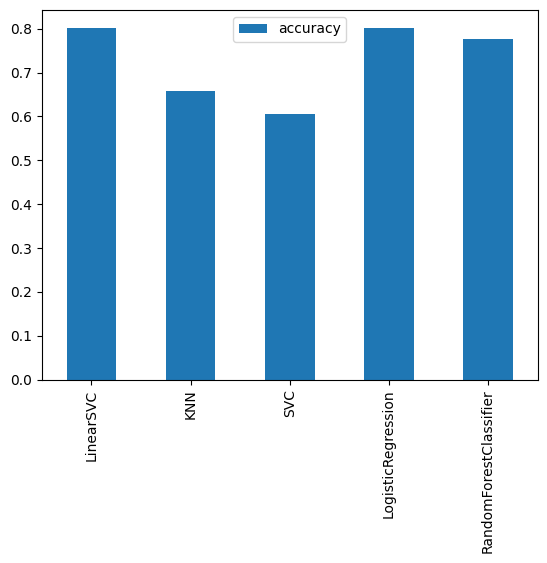

In [20]:
results_df=pd.DataFrame(result.values(),
                        result.keys(),
                        columns=['accuracy'])
results_df

# fig, ax = plt.Subplots()
# ax
results_df.plot.bar()

In [21]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [22]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1438.44988828766)}

In [24]:
rs_log_reg.score(X_test, y_test)

0.8026315789473685

In [25]:
clf = LogisticRegression(**rs_log_reg.best_params_)
clf.fit(X_train,y_train)

LogisticRegression(C=np.float64(1438.44988828766), solver='liblinear')

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

In [27]:
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[25, 12],
       [ 3, 36]])

In [39]:
import seaborn as sns

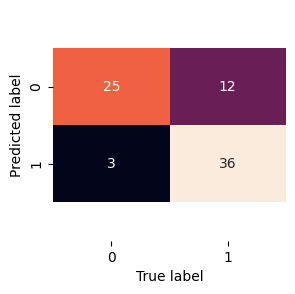

In [40]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_preds)

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        37
           1       0.75      0.92      0.83        39

    accuracy                           0.80        76
   macro avg       0.82      0.80      0.80        76
weighted avg       0.82      0.80      0.80        76



In [43]:
precision_score(y_test, y_preds)
# recall_score(y_test,y_preds)
# f1_score(y_test,y_preds)


0.75

In [44]:
recall_score(y_test,y_preds)


0.9230769230769231

In [45]:
f1_score(y_test,y_preds)

0.8275862068965517

In [47]:
from joblib import load,dump

dump(clf,"clf_model.joblib")

['clf_model.joblib']